# Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import config
import os

In [4]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Gene families

In [5]:
gene_families_clean = pd.read_csv(os.path.join(config.CLEAN_DIR, "humann_genefamilies_overall_clean.tsv"), index_col=0)
gene_families_clean

,Blank_S67_Abundance-RPKs,Postive-Control_S107_Abundance-RPKs,magic-0001_S22_Abundance-RPKs,magic-0004_S34_Abundance-RPKs,magic-0011_S46_Abundance-RPKs,magic-0013_S58_Abundance-RPKs,magic-0015_S70_Abundance-RPKs,magic-0016_S82_Abundance-RPKs,magic-0017_S94_Abundance-RPKs,magic-0018_S106_Abundance-RPKs,...,magic-4106_S362_Abundance-RPKs,magic-4108_S293_Abundance-RPKs,magic-4110_S305_Abundance-RPKs,magic-4111_S317_Abundance-RPKs,magic-4119_S329_Abundance-RPKs,magic-4123_S340_Abundance-RPKs,magic-4128_S352_Abundance-RPKs,magic-4130_S363_Abundance-RPKs,magic-5222_S128_Abundance-RPKs,magic-6559_S282_Abundance-RPKs
# Gene Family,,,,,,,,,,,,,,,,,,,,,
UniRef90_A0A014AUH4,0.0,0.0,0.000000,0.000000,23.076923,101.809517,0.000000,0.000000,178.728779,0.000000,...,0.000000,0.000000,0.000000,296.176049,389.216799,0.000000,0.000000,0.000000,0.000000,264.075697
UniRef90_A0A015QIN6,0.0,0.0,0.000000,34.285714,23.276341,500.364192,0.000000,0.000000,0.000000,0.000000,...,11.823226,6.729264,0.000000,1423.868229,1601.509170,54.252874,1157.594178,61.116503,0.000000,639.267183
UniRef90_A0A015S3B6,0.0,0.0,44.457278,59.178439,0.000000,0.000000,0.000000,17.773586,307.816110,0.000000,...,0.000000,0.000000,0.000000,280.026983,499.285055,0.000000,4555.555556,2253.968254,0.000000,615.865866
UniRef90_A0A015SWD5,0.0,0.0,199.783660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.014279,14.719340,40.145985,284.671533,54.744526,14.680984,2091.280982
UniRef90_A0A015T2E3,0.0,0.0,41.814699,0.000000,74.661589,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,144.571107,65.651523,24.475524,517.494786,20.979021,1019.531987,3611.986346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UniRef90_W8ZG15,0.0,0.0,350.515464,360.824742,0.000000,0.000000,474.226804,371.134021,103.092784,680.412371,...,0.000000,0.000000,0.000000,180.555556,0.000000,138.888889,0.000000,0.000000,55.952381,0.000000
UniRef90_W8ZS14,0.0,0.0,291.139241,347.944991,0.000000,0.000000,303.797468,341.772152,139.240506,443.037975,...,0.000000,0.000000,0.000000,129.629630,0.000000,203.703704,0.000000,0.000000,37.037037,0.000000
UniRef90_W9BC30,0.0,0.0,1.111969,0.263367,0.000000,0.000000,0.000000,0.000000,0.999081,0.000000,...,0.000000,0.575603,1.495034,0.000000,0.000000,0.774827,0.697076,0.000000,1.557742,0.000000


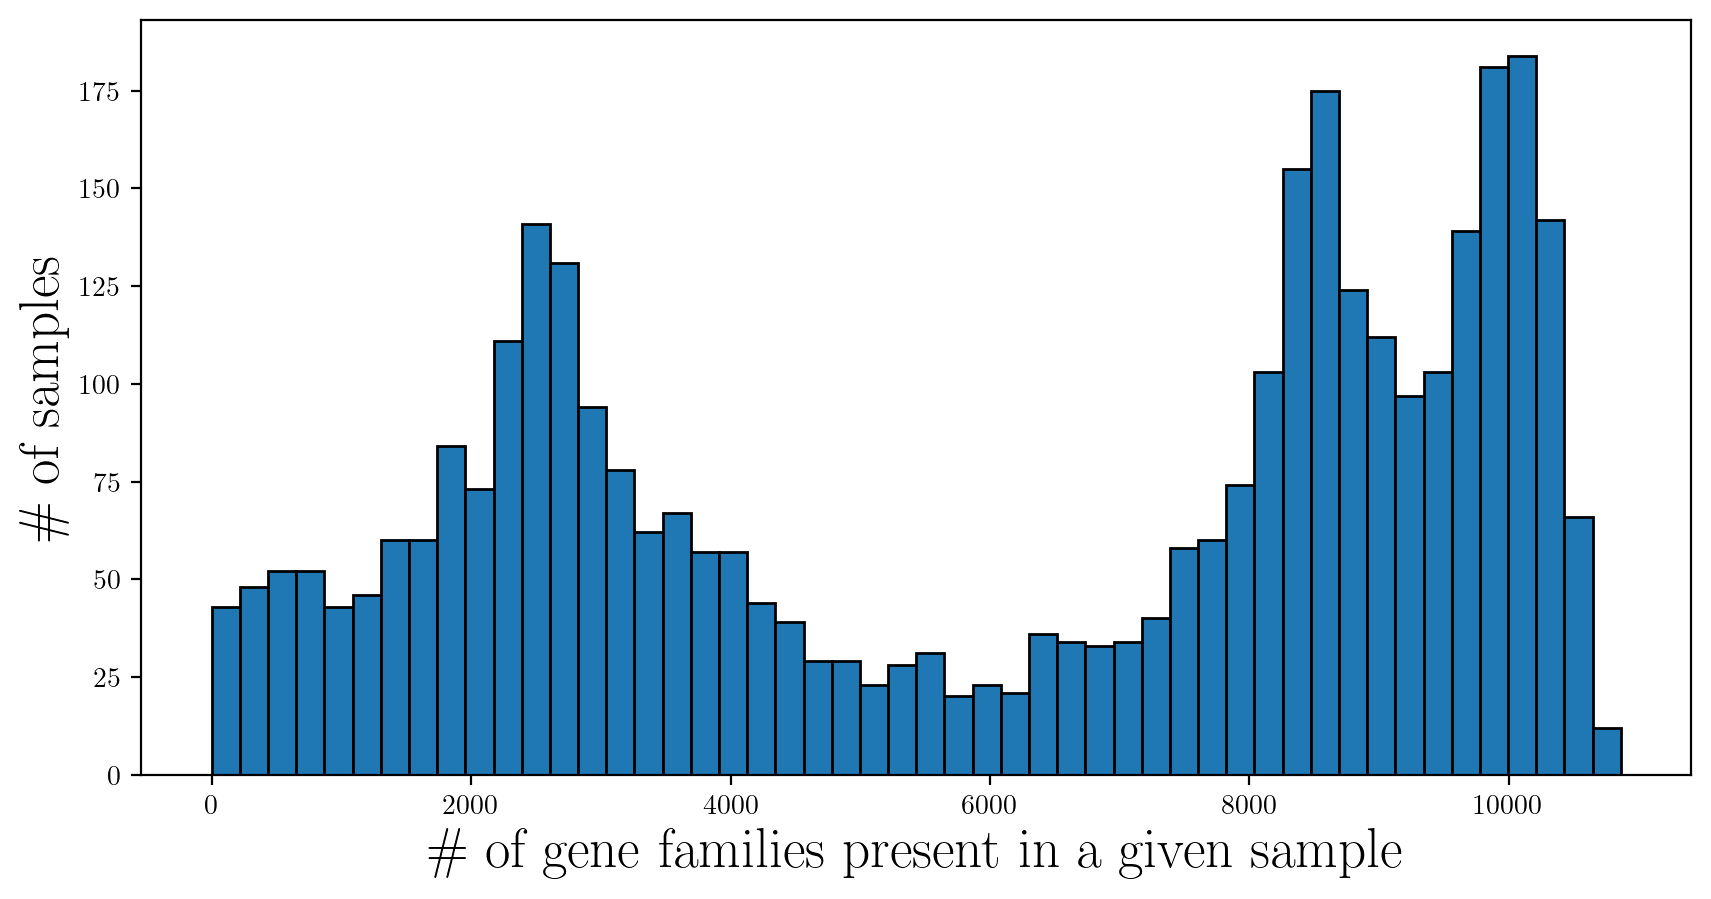

In [10]:
plt.figure(figsize=(10, 5), dpi=200)

gene_presence = (gene_families_clean > 0.75)
counts = gene_presence.sum(axis=0)

plt.hist(counts, bins=50, edgecolor="black")
plt.xlabel("\# of gene families present in a given sample", fontsize=20)
plt.ylabel("\# of samples", fontsize=20)

plt.show()